<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-01-28 10:45:14--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  67.8MB/s    in 3.0s    

2025-01-28 10:45:18 (67.8 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 179.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 181.6 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 197.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 126.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 154.2 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [45]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


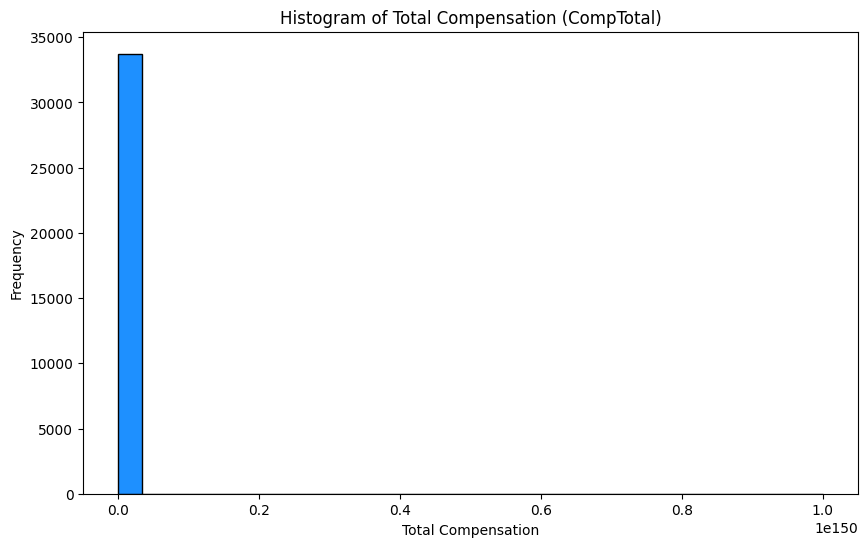

In [8]:
## Write your code here

conn = sqlite3.connect('survey-data.sqlite')

# Query the data for the CompTotal column
df = pd.read_sql_query('SELECT CompTotal FROM main', conn)

# Close the connection after fetching the data
conn.close()

# Convert CompTotal to numeric, forcing errors to NaN
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Drop rows where CompTotal is NaN
df = df.dropna(subset=['CompTotal'])

# Plot the histogram for CompTotal
plt.figure(figsize=(10, 6))
plt.hist(df['CompTotal'], bins=30, color='dodgerblue', edgecolor='black')

# Adding titles and labels
plt.title('Histogram of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')

# Show the plot
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


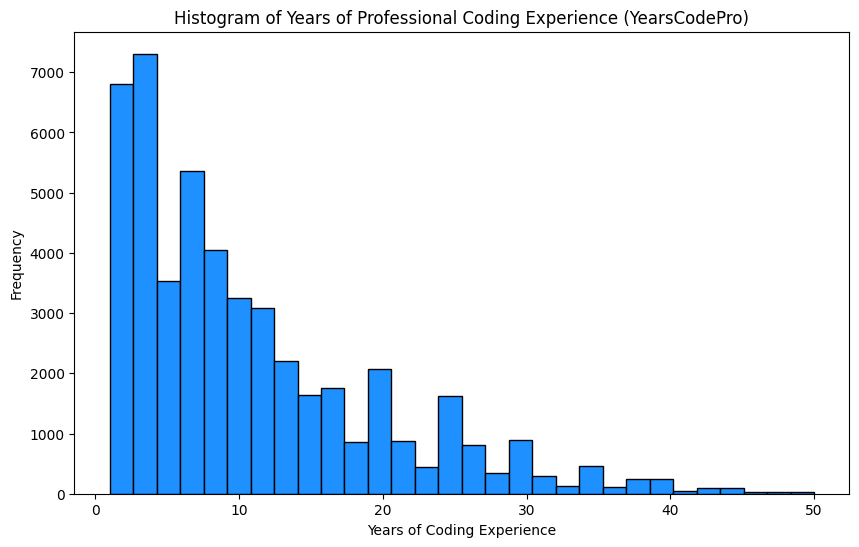

In [9]:
## Write your code here

conn = sqlite3.connect('survey-data.sqlite')

# Query the data for the YearsCodePro column
df = pd.read_sql_query('SELECT YearsCodePro FROM main', conn)

# Close the connection after fetching the data
conn.close()

# Convert YearsCodePro to numeric, forcing errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows where YearsCodePro is NaN
df = df.dropna(subset=['YearsCodePro'])

# Plot the histogram for YearsCodePro
plt.figure(figsize=(10, 6))
plt.hist(df['YearsCodePro'], bins=30, color='dodgerblue', edgecolor='black')

# Adding titles and labels
plt.title('Histogram of Years of Professional Coding Experience (YearsCodePro)')
plt.xlabel('Years of Coding Experience')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


ConvertedCompYearly stats:
 count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64
Number of missing values: 42002


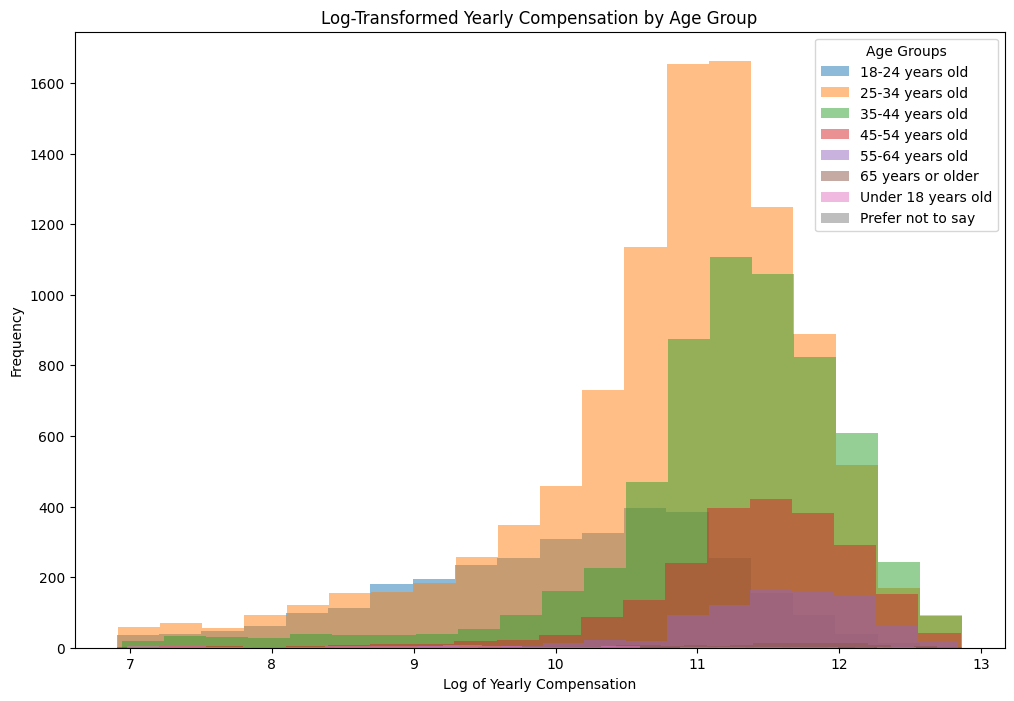

In [12]:
## Write your code here
!pip install numpy
import numpy as np
conn = sqlite3.connect('survey-data.sqlite')
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

# Print statistics for ConvertedCompYearly
print("ConvertedCompYearly stats:\n", df['ConvertedCompYearly'].describe())
print("Number of missing values:", df['ConvertedCompYearly'].isna().sum())

# Filter out rows with missing values in ConvertedCompYearly
df_filtered = df[
    (df['ConvertedCompYearly'] >= 1000) &  # Minimum threshold
    (df['ConvertedCompYearly'] <= df['ConvertedCompYearly'].quantile(0.99))  # Top 1% cutoff
].copy()  # Use `.copy()` to avoid potential SettingWithCopyWarning

# Log-transform the compensation column
df_filtered['LogConvertedComp'] = np.log1p(df_filtered['ConvertedCompYearly'])

# Create a histogram comparing distributions across age groups
plt.figure(figsize=(12, 8))

for age_group in df_filtered['Age'].unique():
    group_data = df_filtered[df_filtered['Age'] == age_group]['LogConvertedComp']
    if len(group_data) > 0:
        plt.hist(group_data, bins=20, alpha=0.5, label=age_group)

plt.title('Log-Transformed Yearly Compensation by Age Group')
plt.xlabel('Log of Yearly Compensation')
plt.ylabel('Frequency')
plt.legend(title='Age Groups')
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


/tmp/ipykernel_133/4092021018.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Age Groups')


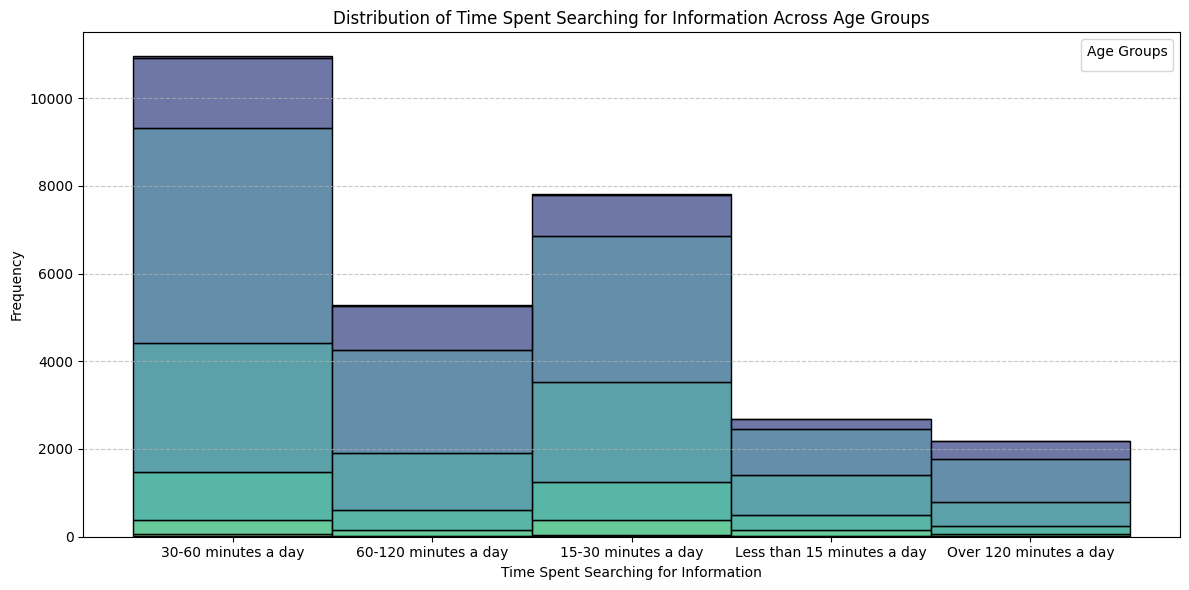

In [26]:
## Write your code here


df_filtered = df[['Age', 'TimeSearching']].dropna().copy()

# Define the order of age groups for better visualization
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old', 
    '35-44 years old', '45-54 years old', '55-64 years old', 
    '65 years or older', 'Prefer not to say'
]

# Plot histograms for TimeSearching across different age groups
plt.figure(figsize=(12, 6))

sns.histplot(data=df_filtered, x='TimeSearching', hue='Age', multiple='stack', bins=20, palette='viridis', hue_order=age_order)

# Titles and labels
plt.title('Distribution of Time Spent Searching for Information Across Age Groups')
plt.xlabel('Time Spent Searching for Information')
plt.ylabel('Frequency')
plt.legend(title='Age Groups')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


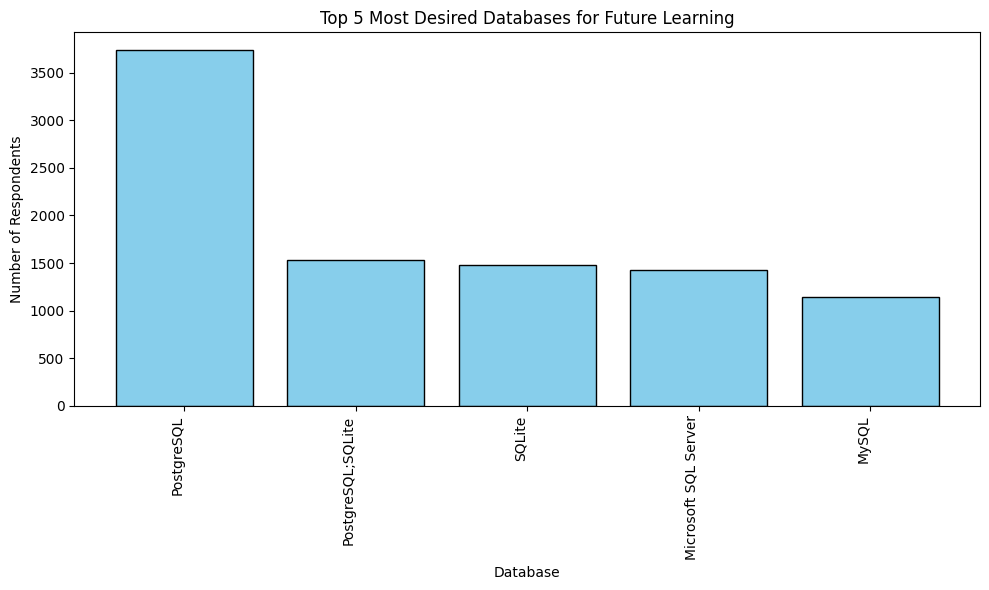

In [16]:
## Write your code here

!pip install collections
from collections import Counter
import matplotlib.pyplot as plt

# Drop rows with missing values in DatabaseWantToWorkWith
df_desired = df.dropna(subset=['DatabaseWantToWorkWith']).copy()

# Split the DatabaseWantToWorkWith column into individual databases (assuming comma-separated values)
database_list = df_desired['DatabaseWantToWorkWith'].str.split(',').explode()

# Count the occurrences of each database
database_counts = Counter(database_list)

# Get the top 5 most desired databases
top_5_databases = database_counts.most_common(5)

# Separate the database names and their counts for plotting
databases, counts = zip(*top_5_databases)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(databases, counts, color='skyblue', edgecolor='black')
plt.title('Top 5 Most Desired Databases for Future Learning')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=90, ha='right')  # Rotate labels for better readability
plt.tight_layout()
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


Unique values in RemoteWork:
 ['Remote' nan 'In-person' 'Hybrid (some remote, some in-person)']


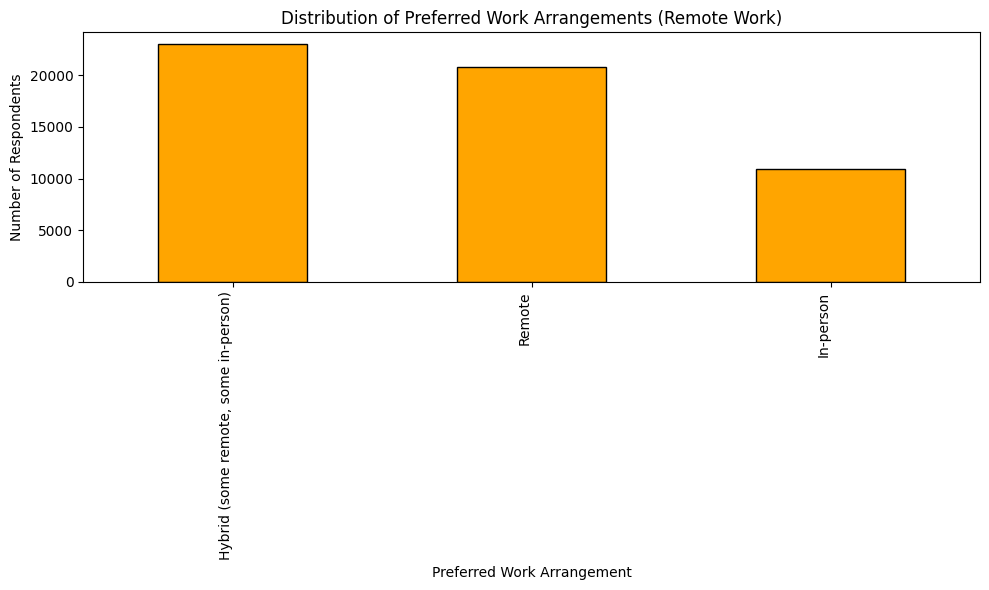

In [19]:
## Write your code here

print("Unique values in RemoteWork:\n", df['RemoteWork'].unique())

# Drop missing values from the RemoteWork column
df_remote = df.dropna(subset=['RemoteWork'])

# Count the occurrences of each work arrangement
remote_work_counts = df_remote['RemoteWork'].value_counts()

# Plot a histogram/bar chart
plt.figure(figsize=(10, 6))
remote_work_counts.plot(kind='bar', color='orange', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Preferred Work Arrangements (Remote Work)')
plt.xlabel('Preferred Work Arrangement')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


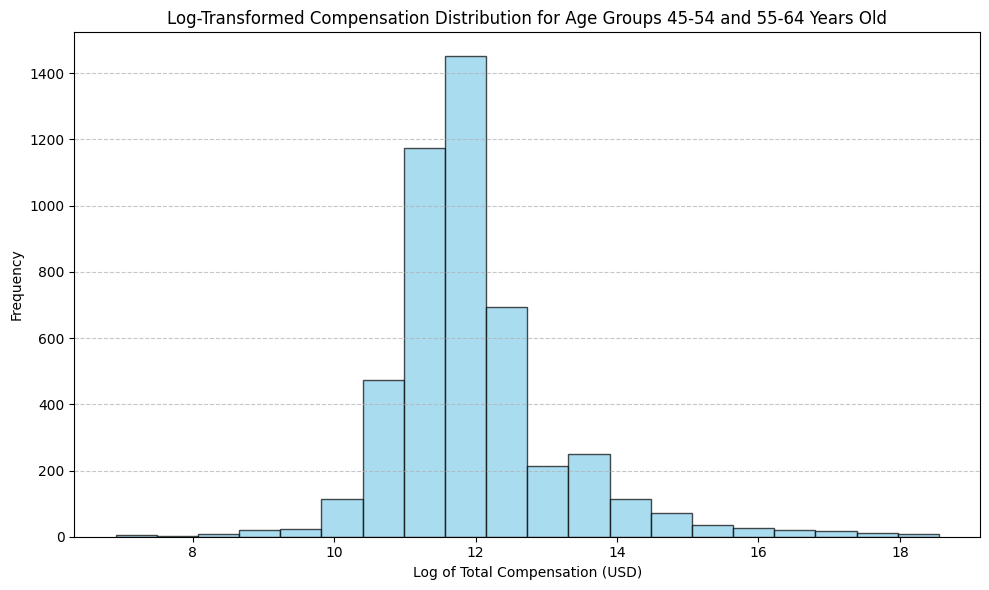

In [21]:
## Write your code here

df_filtered_comp = df[
    (df['Age'].isin(['45-54 years old', '55-64 years old'])) &  # Filter for relevant age groups
    (df['CompTotal'].notna()) &  # Remove missing compensation values
    (df['CompTotal'] >= 1000) &  # Remove extremely low values (e.g., outliers)
    (df['CompTotal'] <= df['CompTotal'].quantile(0.99))  # Exclude top 1% outliers
].copy()

# Apply log transformation to compensation to handle skewness
df_filtered_comp['LogCompTotal'] = np.log1p(df_filtered_comp['CompTotal'])

# Plot the histogram of log-transformed compensation
plt.figure(figsize=(10, 6))
plt.hist(df_filtered_comp['LogCompTotal'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Log-Transformed Compensation Distribution for Age Groups 45-54 and 55-64 Years Old')
plt.xlabel('Log of Total Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


/tmp/ipykernel_133/1468142680.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Experience Level')


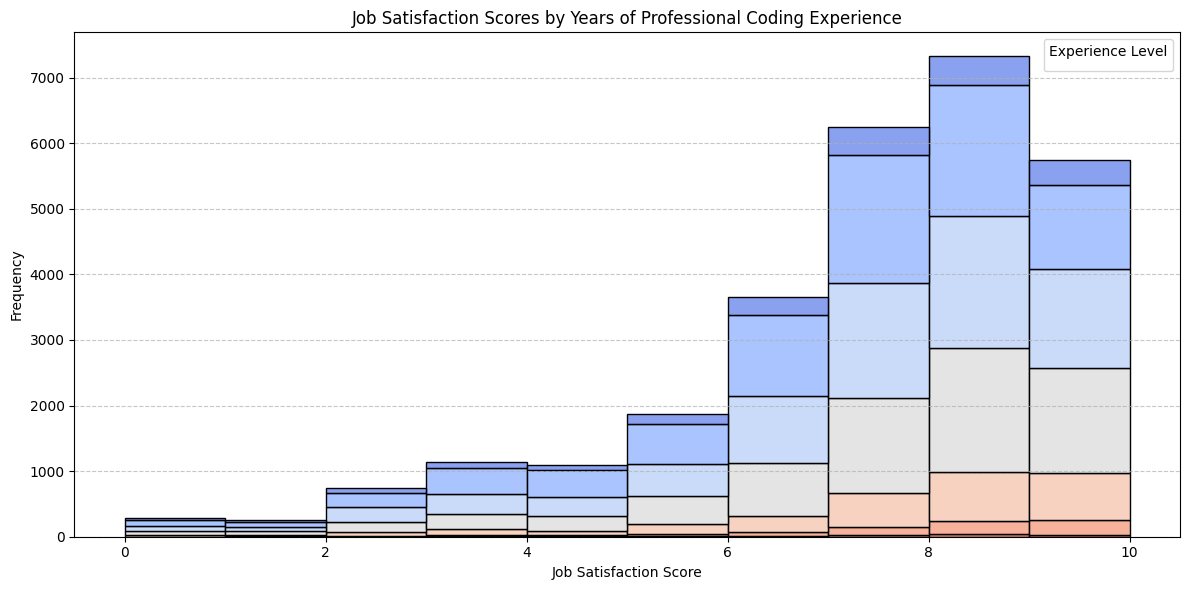

In [25]:
## Write your code here
!pip install seaborn
import seaborn as sns


df_filtered = df[['YearsCodePro', 'JobSat']].dropna().copy()

# Convert YearsCodePro to numeric (handling categorical cases like 'Less than 1 year' and 'More than 50 years')
def convert_years_code(value):
    if value == 'Less than 1 year':
        return 0
    elif value == 'More than 50 years':
        return 51
    else:
        try:
            return float(value)
        except ValueError:
            return None

df_filtered['YearsCodePro'] = df_filtered['YearsCodePro'].apply(convert_years_code)

# Drop any remaining NaN values after conversion
df_filtered = df_filtered.dropna()

# Plot histograms of JobSat for different YearsCodePro groups
plt.figure(figsize=(12, 6))

# Define experience ranges for grouping
bins = [0, 1, 5, 10, 20, 30, 40, 50]
labels = ['<1 year', '1-5 years', '6-10 years', '11-20 years', '21-30 years', '31-40 years', '41-50+ years']
df_filtered['ExperienceGroup'] = pd.cut(df_filtered['YearsCodePro'], bins=bins, labels=labels, include_lowest=True)

# Plot histogram using seaborn
sns.histplot(data=df_filtered, x='JobSat', hue='ExperienceGroup', multiple='stack', bins=10, palette='coolwarm')

# Titles and labels
plt.title('Job Satisfaction Scores by Years of Professional Coding Experience')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Experience Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
